# Searching, Sorting, and Timing

## Agenda

1. Timing
2. Prelude: Timing list indexing
3. Linear search
4. Binary search
5. Insertion sort

## 1. Timing

In [3]:
import time
time.time() #Return time in seconds

1527703918.891561

In [7]:
time.time()

1527704102.7728186

In [12]:
start = time.time()
for i in range(1000000):
    pass
end = time.time()
end - start

0.06938362121582031

In [13]:
def timeit(f):
    start = time.time()
    f()
    end = time.time()
    return end-start
timeit(lambda: [None for i in range(10000)])

0.0011439323425292969

In [17]:
def foo():
    s = 0
    for i in range(1000000):
        s += 1

In [29]:
timeit(foo) #This value will vary because the computer could be doing other things as this function runs

0.09361982345581055

In [31]:
def timeit(f, n=10):
    start = time.time()
    for _ in range(n):
        f()
    end = time.time()
    return (end-start)/n

In [32]:
timeit(foo) #Now is average of running 10 times

0.03858656883239746

In [33]:
timeit(foo, 1000) #Average of running 1000 times

0.038667159557342526

In [36]:
import random
l = [random.randrange(100) for _ in range(10000)]

def foo():
    s = 0
    for i in l:
        s += 1
    return s

In [37]:
timeit(foo)

0.0005517244338989258

In [38]:
import timeit

In [40]:
timeit.timeit(stmt = 'foo()', globals = globals(), number = 100)/100

0.0009779758006334305

## 2. Prelude: Timing list indexing

In [43]:
l = list(range(10000))

In [44]:
l[5000]

5000

In [45]:
l[0]

0

In [46]:
l[9999]

9999

In [47]:
import timeit
timeit.timeit(stmt='lst[0]',
              setup='import random; lst=[0] * 10**6')

0.06545097706839442

In [48]:
timeit.timeit(stmt='lst[10**6-1]',
              setup='import random; lst=[0] * 10**6')

0.02153269900009036

In [56]:
import random
size = 10**3
times = [0] * size
lst   = [0] * size
for _ in range(100):
    for i in range(size):
        times[i] += timeit.timeit(stmt='lst[{}]'.format(i),
                                  globals=globals(),
                                  number=10)

In [51]:
'lst[{}]'.format(10)

'lst[10]'

In [52]:
'{} is to {} as {} is to {}'.format('apples', 'oranges', 'tigers', 'bears')

'apples is to oranges as tigers is to bears'

In [55]:
f'1+5={1+5}' #Should work? 1+5=6

SyntaxError: invalid syntax (<ipython-input-55-0c92f995a55d>, line 1)

In [57]:
times

[5.848600994795561e-05,
 5.413242615759373e-05,
 5.213194526731968e-05,
 5.19090099260211e-05,
 5.169364158064127e-05,
 5.1483744755387306e-05,
 5.163438618183136e-05,
 5.1428331062197685e-05,
 5.155231337994337e-05,
 5.1258248277008533e-05,
 5.242216866463423e-05,
 5.198654253035784e-05,
 5.198491271585226e-05,
 5.153939127922058e-05,
 5.204346962273121e-05,
 5.162612069398165e-05,
 5.169596988707781e-05,
 5.152530502527952e-05,
 5.198200233280659e-05,
 5.162565503269434e-05,
 5.1899696700274944e-05,
 5.176698323339224e-05,
 5.184276960790157e-05,
 5.161575973033905e-05,
 5.1962677389383316e-05,
 5.1692361012101173e-05,
 5.1545677706599236e-05,
 5.150667857378721e-05,
 5.17136650159955e-05,
 5.146267358213663e-05,
 5.186593625694513e-05,
 5.1577575504779816e-05,
 5.146150942891836e-05,
 5.123286973685026e-05,
 5.161925218999386e-05,
 5.1486887969076633e-05,
 5.1617505960166454e-05,
 5.140725988894701e-05,
 5.184055771678686e-05,
 5.1486422307789326e-05,
 5.1688170060515404e-05,
 5.163

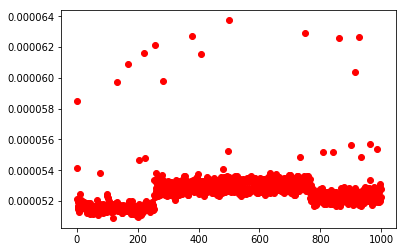

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

In [59]:
l = ['lions', 5, 'tigers', 100, 'a', 'b', 'c', 3.14159]

Accessing an element in a list by index always takes the same amount of time, regardless of position. I.e., indexing incurs a *constant time* delay.

How? **A Python list uses an array as its underlying data storage mechanism.** To access an element in an array, the interpreter:

1. Computes an *offset* into the array by multiplying the element's index by the size of each array entry (which are uniformly sized, since they are merely *references* to the actual elements)
2. Adds the offset to the *base address* of the array

## 3. Linear Search

Task: to locate an element with a given value in a list (array).

In [69]:
def index(lst, x):
    for i in range(len(lst)):
        if lst[i] == x:
            return i
    return None

In [64]:
lst = list(range(100))
index(lst, 10)

10

In [65]:
index(lst, 99)

99

In [70]:
index(lst, -1)

In [71]:
def index(lst, x):
    for i in range(len(lst)):
        if lst[i] == x:
            return i
    raise ValueError(x)

In [72]:
index(lst, 10)

10

In [73]:
index(lst, -1)

ValueError: -1

In [74]:
try:
    print('Value found at', index(lst, -1))
except ValueError as e:
    print('Value not found:', e)

Value not found: -1


In [82]:
import timeit
times = []
lst = list(range(1000))
for x in lst:
    times.append(timeit.timeit(stmt='index(lst, {})'.format(x),
                               globals=globals(),
                               number=100))

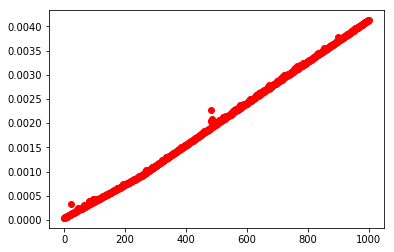

In [83]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

## 4. Binary search

Task: to locate an element with a given value in a list (array) whose contents are *sorted in ascending order*.

Half by half, eliminating the half that is greater than the value you are looking for

ex: for 1024 book, need to half how many times? 1024, 215, 256, 128, 64, 32, 16, 8, 4, 2, 1 (10 times worst case)

This is log(2)x

In [88]:
def index(lst, x):
    # assume that lst is sorted!!!
    lo = 0
    hi = len(lst) #note: this is not an index, be careful
    while lo < hi:
        mid = (lo+hi)//2
        if x > lst[mid]:
            lo = mid + 1
        elif x < lst[mid]:
            hi = mid
        else: # x == lst[mid]
            return mid
    return None

In [89]:
lst = list(range(1000))
index(lst, 10)

10

In [90]:
index(lst, 999)

999

In [91]:
index(lst, -1)

In [92]:
for i in range(len(lst)):
    assert(i == index(lst, i))

In [93]:
import timeit
times = []
lst = list(range(1000))
for x in lst:
    times.append(timeit.timeit(stmt='index(lst, {})'.format(x),
                               globals=globals(),
                               number=1000))

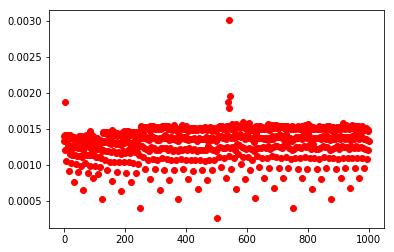

In [94]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

In [98]:
import timeit
import random
times = []
for size in range(100, 10000, 100):
    lst = list(range(size))
    times.append(timeit.timeit(stmt='index(lst, -1)'.format(random.randrange(size)),
                               globals=globals(),
                               number=10000))

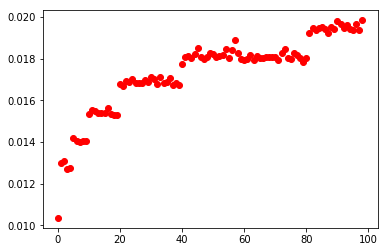

In [99]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

In [100]:
import timeit
import random
times = []
for e in range(5, 20):
    lst = list(range(2**e))
    times.append(timeit.timeit(stmt='index(lst, -1)',
                               globals=globals(),
                               number=100000))

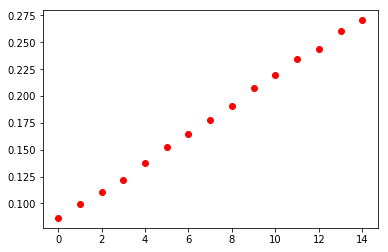

In [101]:
import matplotlib.pyplot as plt
plt.plot(times, 'ro')
plt.show()

## 5. Insertion sort

Task: to sort the values in a given list (array) in ascending order.

Does this by inserting unsorted elements into a sorted list. Look at 2nd, place in correct position according to first.  Continue element by element comparing to previous sorted list, until all elements are sorted.  This occurs by swapping element in question with the element previous (backwards) to it until it is in the correct place.

In [102]:
import random
lst = list(range(1000))
random.shuffle(lst)

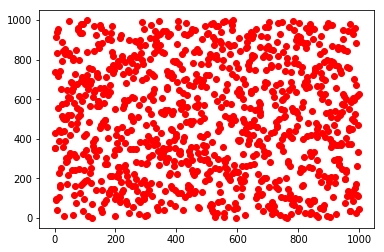

In [103]:
plt.plot(lst, 'ro')
plt.show()

In [104]:
def insertion_sort(lst):
    for i in range(1, len(lst)):
        for j in range(i,0,-1):
            if lst[j] < lst[j-1]:
                lst[j-1], lst[j] = lst[j], lst[j-1]
            else:
                break

In [105]:
insertion_sort(lst)

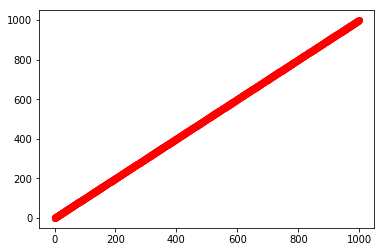

In [106]:
plt.plot(lst, 'ro')
plt.show()

In [110]:
import timeit
import random
times = []
for size in range(100, 5000, 100):
    lst = list(range(size))
    times.append(timeit.timeit(stmt='insertion_sort(lst)',
                               setup='random.shuffle(lst)',
                               globals=globals(),
                               number=1))

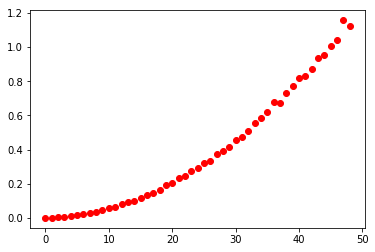

In [111]:
plt.plot(times, 'ro')
plt.show()